# Importing the libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn 
%matplotlib inline

# Importing the dataset

In [6]:
df = pd.read_csv('data_asina_football.csv')

In [7]:
df

,id,国家,2019年国际排名,2018年世界杯,2015年亚洲杯
0,0,中国,73,40,7
1,1,日本,60,15,5
2,2,韩国,61,19,2
3,3,伊朗,34,18,6
4,4,沙特,67,26,10
5,5,伊拉克,91,40,4
6,6,卡塔尔,101,40,13
7,7,阿联酋,81,40,6
8,8,乌兹别克斯坦,88,40,8
9,9,泰国,122,40,17


In [30]:
df.rename(columns={'国家':'Country','2019年国际排名':'2019I-Ranking','2018年世界杯':'2018 World Cup','2015年亚洲杯':'2015 Asian Cup'},inplace=True)

In [31]:
df

,id,Country,2019I-Ranking,2018 World Cup,2015 Asian Cup
0,0,中国,73,40,7
1,1,日本,60,15,5
2,2,韩国,61,19,2
3,3,伊朗,34,18,6
4,4,沙特,67,26,10
5,5,伊拉克,91,40,4
6,6,卡塔尔,101,40,13
7,7,阿联酋,81,40,6
8,8,乌兹别克斯坦,88,40,8
9,9,泰国,122,40,17


In [32]:
df.shape

(20, 5)

In [33]:
df.isnull().values.any()

False

In [34]:
df.describe()

,id,2019I-Ranking,2018 World Cup,2015 Asian Cup
count,20.00000,20.000000,20.000000,20.000000
mean,9.50000,92.350000,39.400000,10.350000
std,5.91608,33.978747,11.784915,5.314083
min,0.00000,34.000000,15.000000,1.000000
25%,4.75000,71.500000,37.500000,6.000000
50%,9.50000,89.500000,40.000000,10.500000
75%,14.25000,111.500000,50.000000,15.250000
max,19.00000,164.000000,50.000000,17.000000


# Data analysis: visual analysis

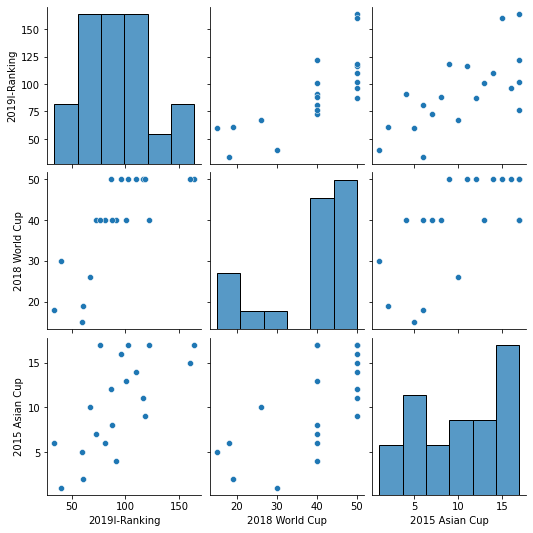

In [35]:
seaborn.pairplot(df[['2019I-Ranking','2018 World Cup','2015 Asian Cup']])

# 1st clustering

In [36]:
import sklearn.cluster as cluster 

In [37]:
kmeans=cluster.KMeans(n_clusters=3)

In [39]:
kmeans=kmeans.fit(df[['2018 World Cup','2019I-Ranking']])

In [40]:
kmeans.cluster_centers_

array([[ 45.45454545, 101.09090909],
       [ 26.85714286,  58.71428571],
       [ 50.        , 162.        ]])

In [41]:
df['2018 World Cup_clusters']=kmeans.labels_

In [42]:
df

,id,Country,2019I-Ranking,2018 World Cup,2015 Asian Cup,2018 World Cup_clusters
0,0,中国,73,40,7,1
1,1,日本,60,15,5,1
2,2,韩国,61,19,2,1
3,3,伊朗,34,18,6,1
4,4,沙特,67,26,10,1
5,5,伊拉克,91,40,4,0
6,6,卡塔尔,101,40,13,0
7,7,阿联酋,81,40,6,0
8,8,乌兹别克斯坦,88,40,8,0
9,9,泰国,122,40,17,0


In [43]:
df['2018 World Cup_clusters'].value_counts()

0    11
1     7
2     2
Name: 2018 World Cup_clusters, dtype: int64

<AxesSubplot:xlabel='2019I-Ranking', ylabel='2018 World Cup'>

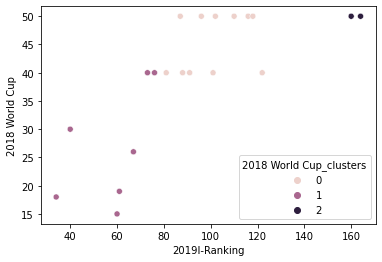

In [46]:
seaborn.scatterplot(x='2019I-Ranking',y='2018 World Cup',hue='2018 World Cup_clusters',data=df)

# 2nd clustering

In [47]:
kmeans=cluster.KMeans(n_clusters=3)

In [48]:
kmeans=kmeans.fit(df[['2015 Asian Cup','2019I-Ranking']])

In [49]:
kmeans.cluster_centers_

array([[  6.75,  61.5 ],
       [ 12.1 , 103.1 ],
       [ 16.  , 162.  ]])

In [50]:
df['2015 World Cup_clusters']=kmeans.labels_

In [51]:
df['2015 World Cup_clusters'].value_counts()

1    10
0     8
2     2
Name: 2015 World Cup_clusters, dtype: int64

In [52]:
df

,id,Country,2019I-Ranking,2018 World Cup,2015 Asian Cup,2018 World Cup_clusters,2015 World Cup_clusters
0,0,中国,73,40,7,1,0
1,1,日本,60,15,5,1,0
2,2,韩国,61,19,2,1,0
3,3,伊朗,34,18,6,1,0
4,4,沙特,67,26,10,1,0
5,5,伊拉克,91,40,4,0,1
6,6,卡塔尔,101,40,13,0,1
7,7,阿联酋,81,40,6,0,0
8,8,乌兹别克斯坦,88,40,8,0,1
9,9,泰国,122,40,17,0,1


<AxesSubplot:xlabel='2015 Asian Cup', ylabel='2019I-Ranking'>

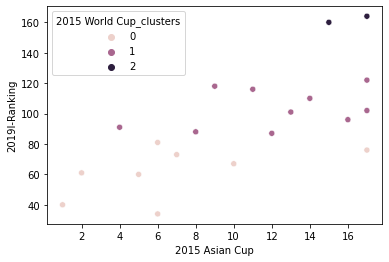

In [57]:
seaborn.scatterplot(x='2015 Asian Cup',y='2019I-Ranking',hue='2015 World Cup_clusters',data=df)